# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [42]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale
from skimage import morphology
from skimage import filters
from skimage import measure



Pretty printing has been turned OFF


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

In [7]:
satpath = "./images/FindingContours.png"
lena1 = img_as_ubyte(io.imread(satpath, as_grey=True))


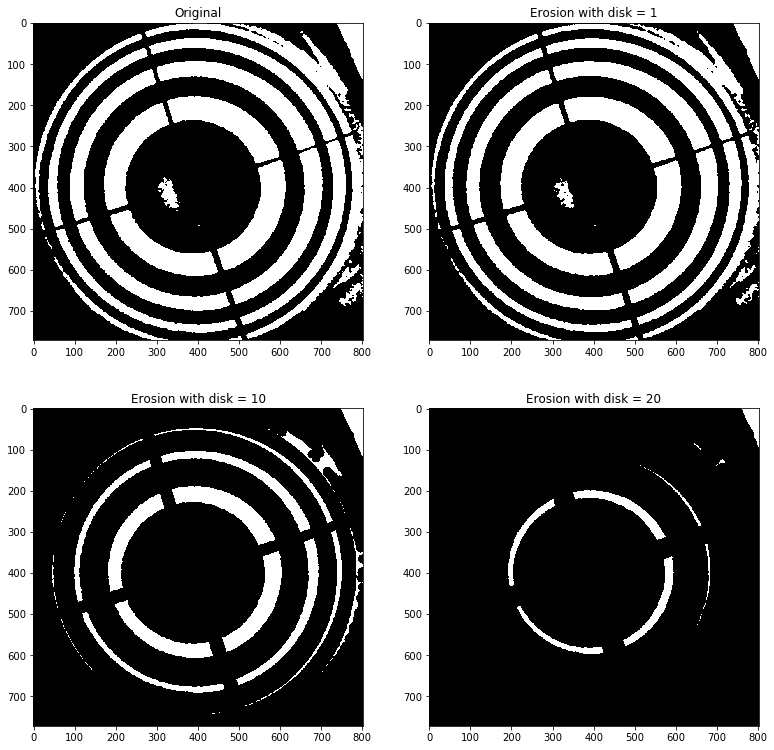

In [16]:
lenaero1 = morphology.erosion(lena1, morphology.disk(1))
lenaero10 = morphology.erosion(lena1, morphology.disk(10))
lenaero20 = morphology.erosion(lena1, morphology.disk(20))

plt.figure(figsize = (2^15,2^15))
plt.subplot(221)
plt.imshow(lena1, cmap = cm.Greys_r)
plt.title('Original') 
plt.subplot(222)
plt.imshow(lenaero1, cmap = cm.Greys_r)
plt.title('Erosion with disk = 1') 
plt.subplot(223)
plt.imshow(lenaero10, cmap = cm.Greys_r)
plt.title('Erosion with disk = 10') 
plt.subplot(224)
plt.imshow(lenaero20, cmap = cm.Greys_r)
plt.title('Erosion with disk = 20') 

** Q.1.2 Dilation **

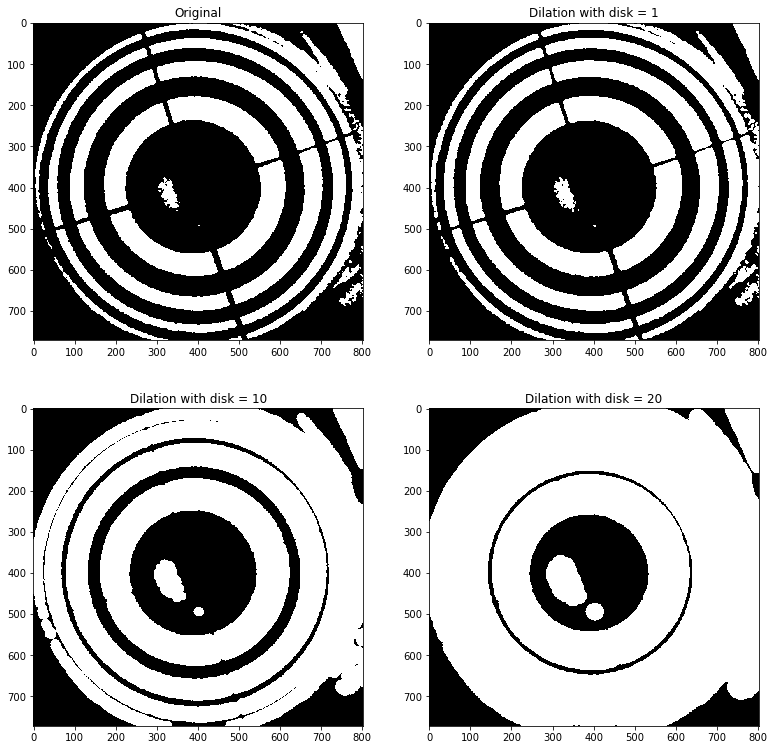

In [17]:
lenadila1 = morphology.dilation(lena1, morphology.disk(1))
lenadila10 = morphology.dilation(lena1, morphology.disk(10))
lenadila20 = morphology.dilation(lena1, morphology.disk(20))

plt.figure(figsize = (2^15,2^15))
plt.subplot(221)
plt.imshow(lena1, cmap = cm.Greys_r)
plt.title('Original') 
plt.subplot(222)
plt.imshow(lenadila1, cmap = cm.Greys_r)
plt.title('Dilation with disk = 1') 
plt.subplot(223)
plt.imshow(lenadila10, cmap = cm.Greys_r)
plt.title('Dilation with disk = 10') 
plt.subplot(224)
plt.imshow(lenadila20, cmap = cm.Greys_r)
plt.title('Dilation with disk = 20') 


** Q.1.3 Opening **

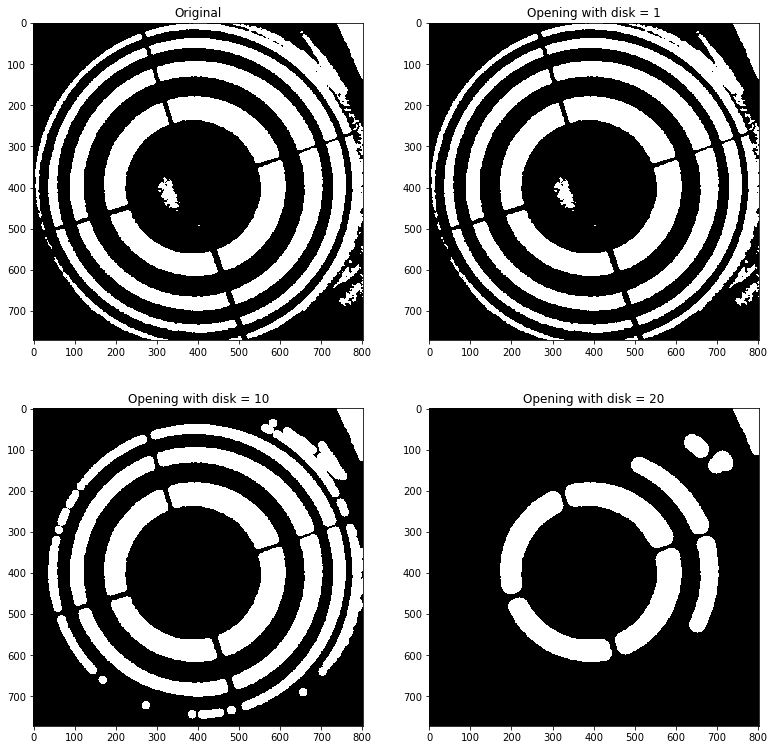

In [18]:
lenaopen1 = morphology.opening(lena1, morphology.disk(1))
lenaopen10 = morphology.opening(lena1, morphology.disk(10))
lenaopen20 = morphology.opening(lena1, morphology.disk(20))

plt.figure(figsize = (2^15,2^15))
plt.subplot(221)
plt.imshow(lena1, cmap = cm.Greys_r)
plt.title('Original') 
plt.subplot(222)
plt.imshow(lenaopen1, cmap = cm.Greys_r)
plt.title('Opening with disk = 1') 
plt.subplot(223)
plt.imshow(lenaopen10, cmap = cm.Greys_r)
plt.title('Opening with disk = 10') 
plt.subplot(224)
plt.imshow(lenaopen20, cmap = cm.Greys_r)
plt.title('Opening with disk = 20') 

** Q.1.4 Closing**

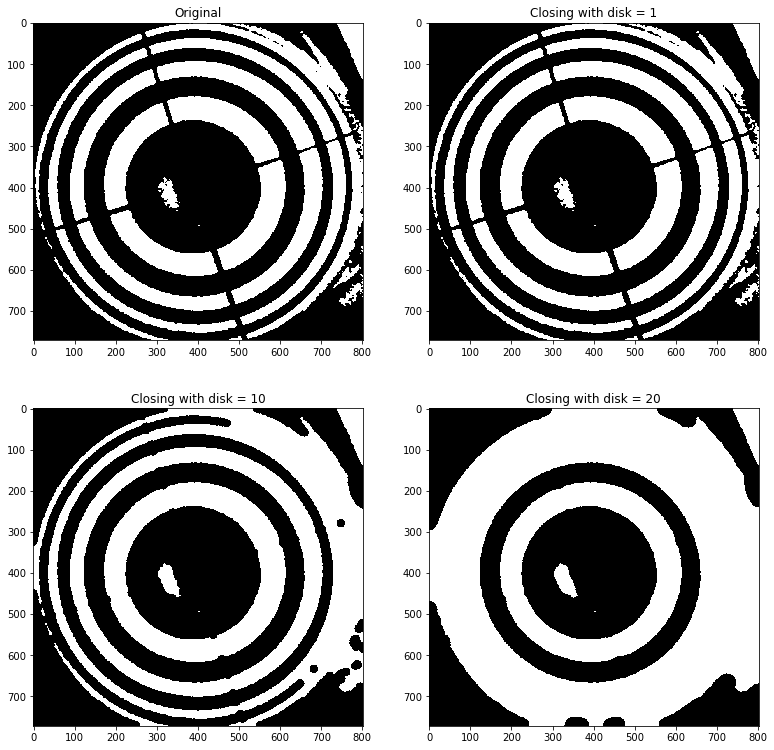

In [19]:
lenaclose1 = morphology.closing(lena1, morphology.disk(1))
lenaclose10 = morphology.closing(lena1, morphology.disk(10))
lenaclose20 = morphology.closing(lena1, morphology.disk(20))

plt.figure(figsize = (2^15,2^15))
plt.subplot(221)
plt.imshow(lena1, cmap = cm.Greys_r)
plt.title('Original') 
plt.subplot(222)
plt.imshow(lenaclose1, cmap = cm.Greys_r)
plt.title('Closing with disk = 1') 
plt.subplot(223)
plt.imshow(lenaclose10, cmap = cm.Greys_r)
plt.title('Closing with disk = 10') 
plt.subplot(224)
plt.imshow(lenaclose20, cmap = cm.Greys_r)
plt.title('Closing with disk = 20') 

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

Erosion: Erode/shrink the object
Dilation: Dilate/enflate/enlarge the object
Opening: Erosion then dilation. remove small particules
Closing: Dilation then Erosion. Close holes

## 5.2 Segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

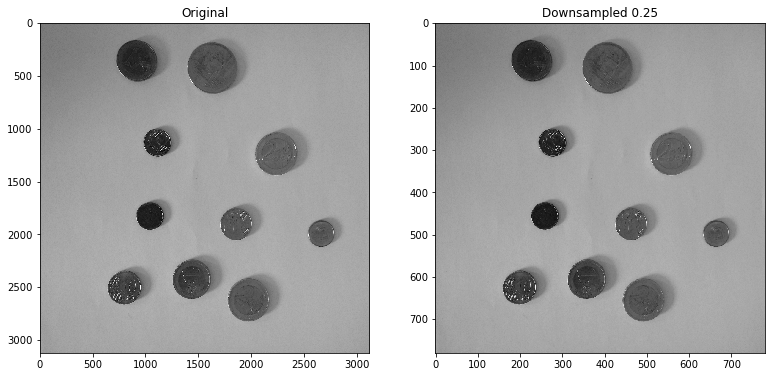

In [26]:
satpath = "./images/coins.jpg"
coins = img_as_ubyte(io.imread(satpath, as_grey=True))
coins4 = rescale(coins,0.25)

plt.figure(figsize = (2^15,2^15))
plt.subplot(121)
plt.imshow(coins, cmap = cm.Greys_r)
plt.title('Original') 
plt.subplot(122)
plt.imshow(coins4, cmap = cm.Greys_r)
plt.title('Downsampled 0.25') 

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

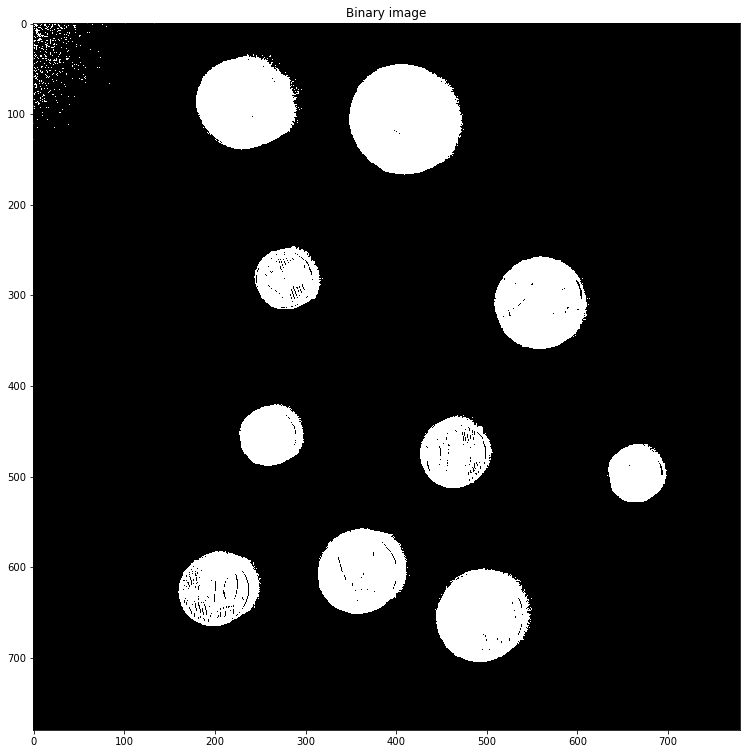

In [27]:
coinsbin = coins4 <= filters.threshold_otsu(coins4)
plt.figure(figsize = (2^15,2^15))
plt.imshow(coinsbin, cmap = cm.Greys_r)
plt.title('Binary image') 

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

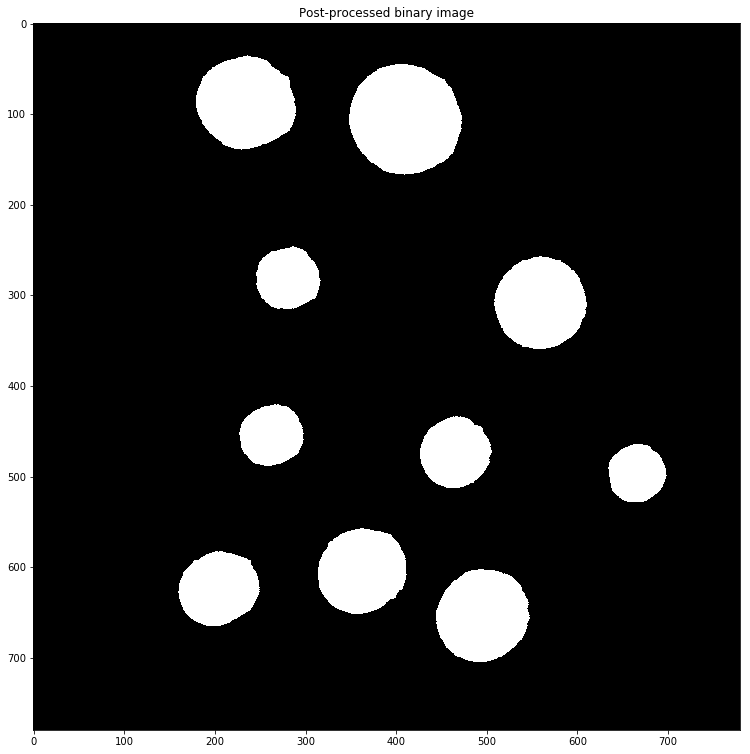

In [49]:
coinspostpro = morphology.opening(coinsbin, morphology.disk(1)) # remove small noise
coinspostpro = morphology.closing(coinspostpro, morphology.disk(4)) # remove holes in coins
coinsfinal = morphology.opening(coinspostpro, morphology.disk(5)) # remove bigger noise
plt.figure(figsize = (2^15,2^15))
plt.imshow(coinsfinal, cmap = cm.Greys_r)
plt.title('Post-processed binary image')

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


Number of regions: 10
<skimage.measure._regionprops._RegionProperties object at 0x7f89a2a421d0> this region has a radius of 61 pixels
<skimage.measure._regionprops._RegionProperties object at 0x7f89a2a42210> this region has a radius of 35 pixels
<skimage.measure._regionprops._RegionProperties object at 0x7f89a2a42250> this region has a radius of 51 pixels
<skimage.measure._regionprops._RegionProperties object at 0x7f89a2a42290> this region has a radius of 35 pixels
<skimage.measure._regionprops._RegionProperties object at 0x7f89a2a422d0> this region has a radius of 39 pixels
<skimage.measure._regionprops._RegionProperties object at 0x7f89a2a42310> this region has a radius of 32 pixels
<skimage.measure._regionprops._RegionProperties object at 0x7f89a2a42350> this region has a radius of 48 pixels
<skimage.measure._regionprops._RegionProperties object at 0x7f89a2a42390> this region has a radius of 42 pixels
<skimage.measure._regionprops._RegionProperties object at 0x7f89a2a423d0> this reg

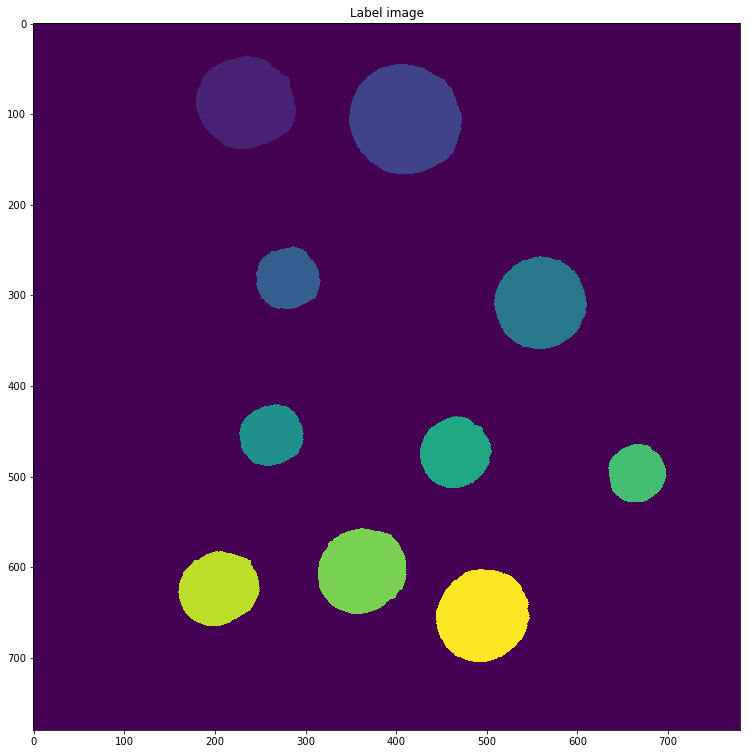

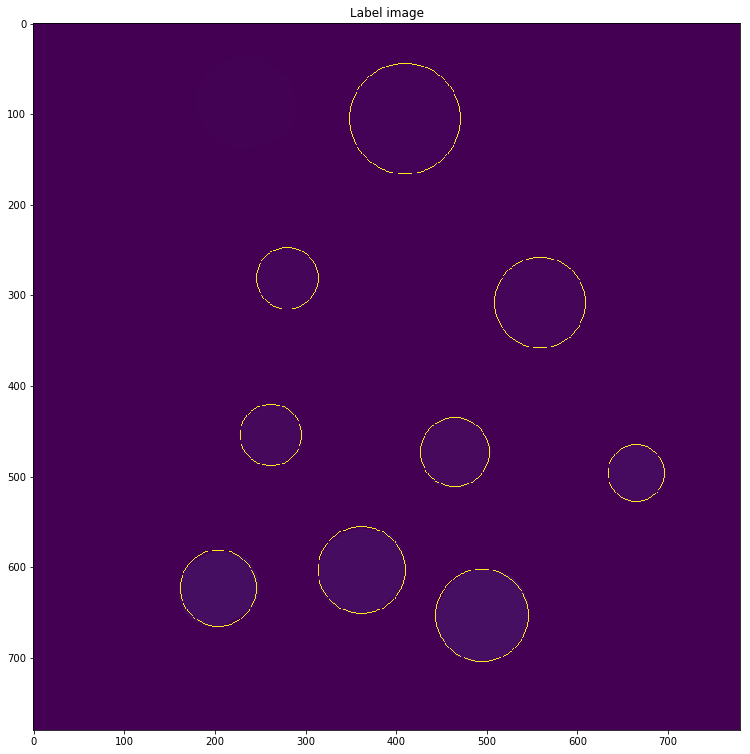

In [81]:
from skimage import draw
coinslabel, nblabel = measure.label(coinsfinal, return_num=True)
plt.figure(figsize = (2^15,2^15))
plt.imshow(coinslabel)
plt.title('Label image')

print('Number of regions: {}'.format(nblabel))
regions = measure.regionprops(coinslabel, cache=True)
for idx, region in enumerate(regions):
    if idx ==0:
        continue
    rad = region.equivalent_diameter/2.0
    coord = region.centroid
    print(region,'this region has a radius of {:.0f} pixels'.format(rad))
    circle = draw.circle_perimeter(int(coord[0]),int(coord[1]), int(rad), method='bresenham', shape=None) *255
    coinslabel[circle[0],circle[1]]=255
    
plt.figure(figsize = (2^15,2^15))
plt.imshow(coinslabel)
plt.title('Label image')

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

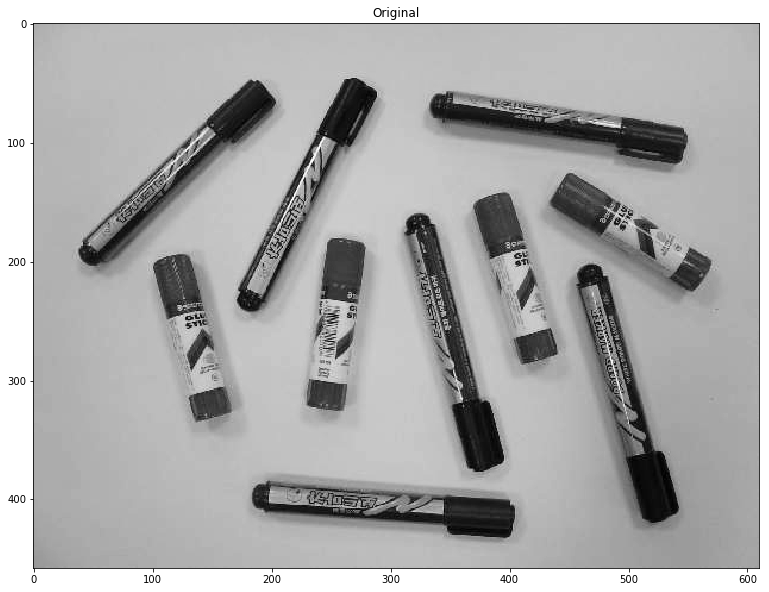

In [82]:
satpath = "./images/objets4.jpg"
objects = img_as_ubyte(io.imread(satpath, as_grey=True))

plt.figure(figsize = (2^15,2^15))
plt.imshow(objects, cmap = cm.Greys_r)
plt.title('Original') 

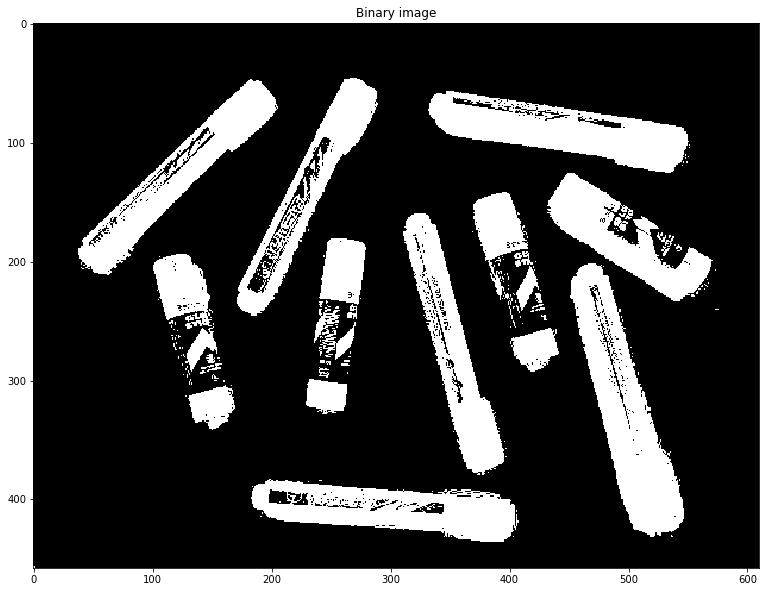

In [177]:
objectsbinary = objects <= filters.threshold_otsu(objects)+30
plt.figure(figsize = (2^15,2^15))
plt.imshow(objectsbinary, cmap = cm.Greys_r)
plt.title('Binary image') 

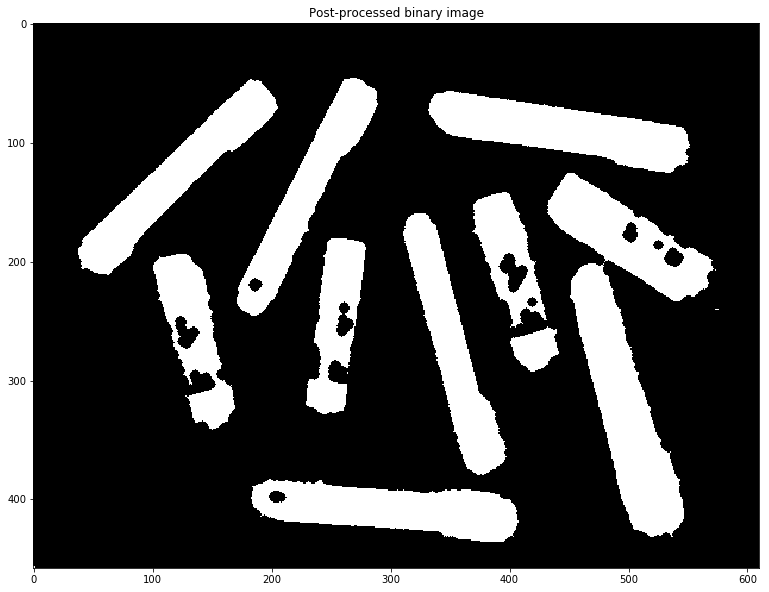

In [182]:
objectsres = morphology.closing(objectsbinary, morphology.disk(4)) # remove small noise
plt.figure(figsize = (2^15,2^15))
plt.imshow(objectsres, cmap = cm.Greys_r)
plt.title('Post-processed binary image')